Libraries

In [1]:
import numpy as np
import pandas as pd
from itertools import product
import matplotlib.pyplot as plt
from random import randint
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

Part A: Probability

Probability Function

In [2]:
def probability(i,k):
    if(i==1 or i==k):
        return 1/2**(k-1)
    return 1/2**(i-1)

Combinations

In [3]:
def combinations(k,t):
    temp = [list(range(1, k+1)) for _ in range(t)]
    comb={}
    for i in range(t,k*t+1):
        comb[i]=[]
    res = list(product(*temp))
    for x in res:
        comb[sum(x)].append(list(x))
    return comb

Probability Distribution

In [4]:
def pdf(k,t):
    exp=combinations(k,t)
    disFunc={}
    prob={}
    for i in range(1,k+1):
        prob[i]=probability(i,k)
    for i in range(t,k*t+1):
        sample=exp[i]
        tot=0
        for s in sample:
            temp=1
            for p in s:
                temp*=prob[p]
            tot+=temp
        disFunc[i]=tot
    return disFunc

Experiment

In [5]:
def experiment(k,t,trials):
    simulation=[]
    for _ in range(trials):
        exp=[]
        for _ in range(t):
            exp.append(randint(1, k))
        simulation.append(sum(exp))
    return simulation

Plot Frequency Distribution Histogram

In [6]:
def histogram(values):
    fig, ax = plt.subplots(figsize =(10, 7))
    ax.hist(values,rwidth=0.95, color='blue', alpha=0.7)
    plt.xlabel('Sum of Upward Face Value')
    plt.ylabel('Frequency')
    plt.title('Frequency Distribution Graph')
    plt.grid(True)
    plt.show()

Five Number Summary

In [7]:
def five_Number_Summary(values):
    IQR = sorted(values)
    minimum = IQR[0]
    maximum = IQR[-1]
    q1 = IQR[round(0.25 * len(IQR))]
    median = IQR[round(0.5 * len(IQR))]
    q3 = IQR[round(0.75 * len(IQR))]
    print("Minimum:", minimum)
    print("Q1 (25th percentile):", q1)
    print("Median (50th percentile):", median)
    print("Q3 (75th percentile):", q3)
    print("Maximum:", maximum)

Expectation Sum

In [8]:
def expectation(sample):
    E_X = 0
    for i in sample.keys():
        E_X+=i*sample[i]
    print(f"Theoretical Expectation E[x] = {E_X}")

1. K=4,Rolls=4,Trials=1000

Experiment

In [9]:
exp=experiment(4,4,1000)

Histogram

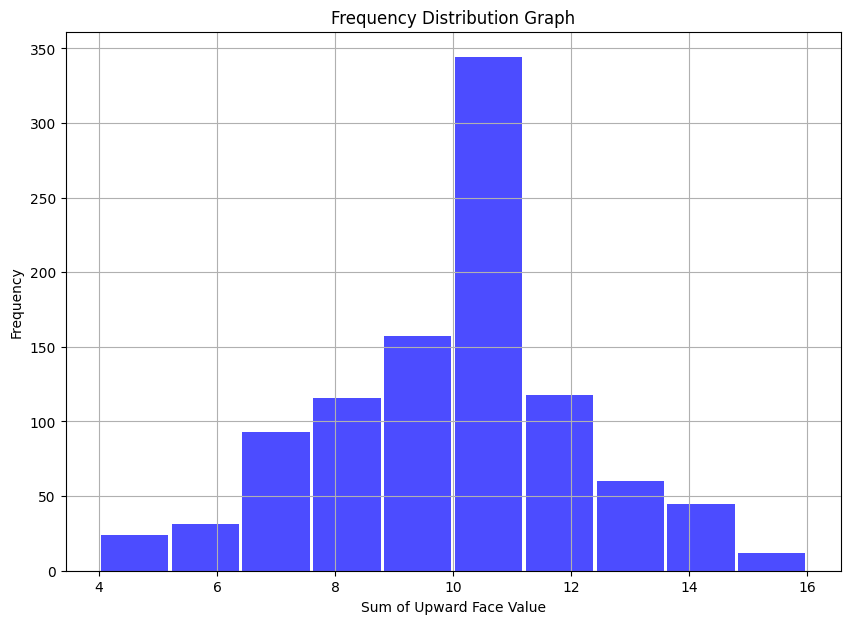

In [10]:
histogram(exp)

Five-Number Summary

In [11]:
five_Number_Summary(exp)

Minimum: 4
Q1 (25th percentile): 8
Median (50th percentile): 10
Q3 (75th percentile): 11
Maximum: 16


Expected Value of Random Variable

In [12]:
ss=pdf(4,4)
expectation(ss)

Theoretical Expectation E[x] = 9.5


In Simulation, the actual Sum got is 10, the Theoretical Expectation is 9.5, which is close to 10

2. K=4, Rolls=8, Trials=1000

Experiment

In [13]:
exp=experiment(4,6,1000)

Histogram

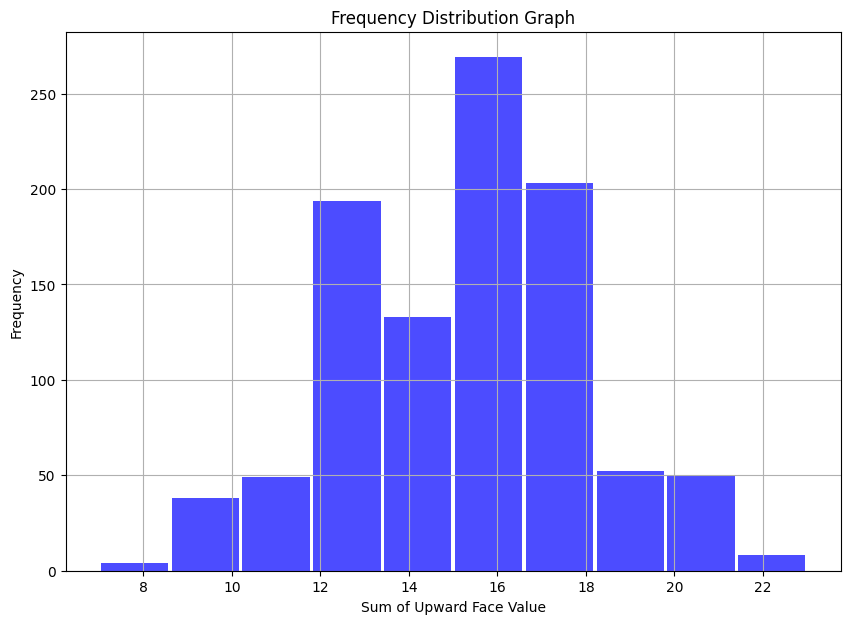

In [14]:
histogram(exp)

Five-Number-Summary

In [15]:
five_Number_Summary(exp)

Minimum: 7
Q1 (25th percentile): 13
Median (50th percentile): 15
Q3 (75th percentile): 17
Maximum: 23


Expected Value of Random Variable

In [16]:
ss=pdf(4,6)
expectation(ss)

Theoretical Expectation E[x] = 14.25


In Simulation, the actual Sum got is 15, the Theoretical Expectation is 14.25, which is close to 15

3.1 K=16, Rolls=4, Trials=1000

Experiment

In [17]:
exp=experiment(16,4,1000)

Histogram

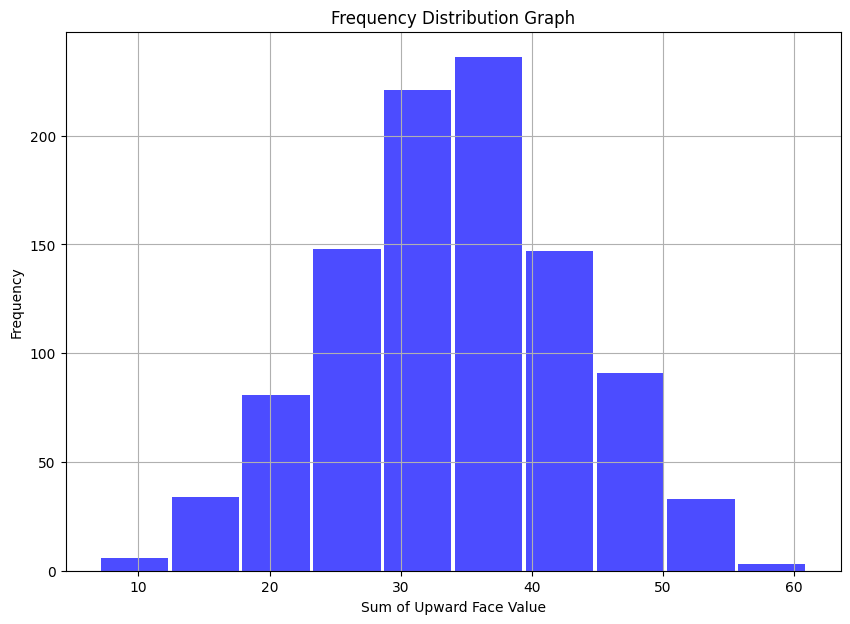

In [18]:
histogram(exp)

Five-Number-Summary

In [19]:
five_Number_Summary(exp)

Minimum: 7
Q1 (25th percentile): 28
Median (50th percentile): 34
Q3 (75th percentile): 40
Maximum: 61


3.2 K=16, Rolls=8, Trials=1000

Experiment

In [20]:
exp=experiment(16,8,1000)

Histogram

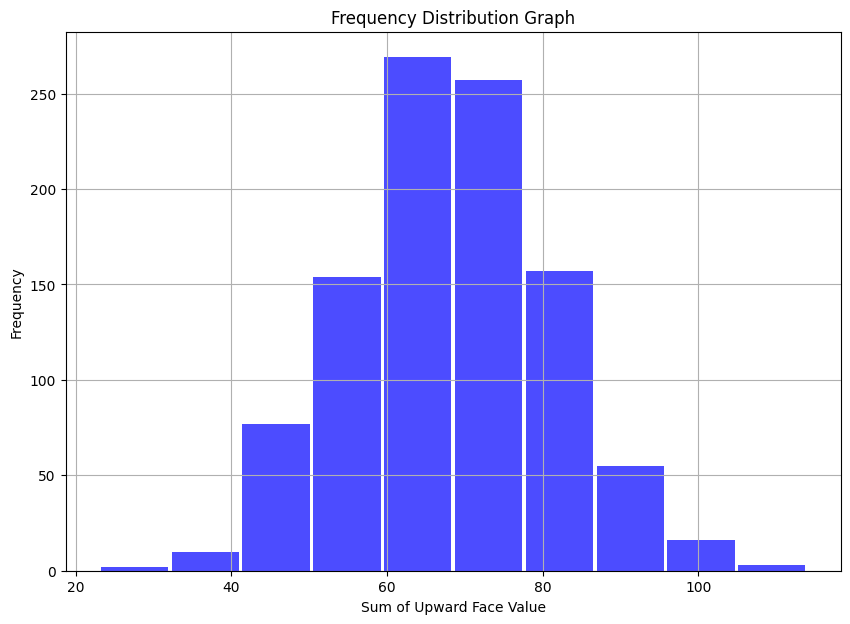

In [21]:
histogram(exp)

Five-Number-Summary

In [22]:
five_Number_Summary(exp)

Minimum: 23
Q1 (25th percentile): 60
Median (50th percentile): 68
Q3 (75th percentile): 77
Maximum: 114


Part B: Implementation of Naive Bayes

Load Dataset

In [23]:
spambase = fetch_ucirepo(id=94)
x = spambase.data.features
y = spambase.data.targets

Naive-Bayes Classifier

In [24]:
class NaiveBayes:
    def prior(self, Y_Train):
        N=Y_Train.shape[0]
        self.Num_Classes=len(Y_Train.value_counts())
        self._prior=[]
        for i in Y_Train.value_counts():
            self._prior.append(i/N)

    def fit(self, X_Train, Y_Train):
        self.Num_Features=X_Train.shape[1]
        self.mean=np.asarray(X_Train.groupby(Y_Train[Y_Train.columns[0]]).mean())
        self.var=np.asarray(X_Train.groupby(Y_Train[Y_Train.columns[0]]).var())
        self.prior(Y_Train)   

    def predict(self, X):
        class_pred=[]
        test_Size=X.shape[0]
        X=np.asarray(X)
        posterior=[]
        for i in range(0,self.Num_Classes):
            '''log(e^((-(x-mean)**2)/2*var))/(2*pi*var)) =
                ((-(x-mean)**2)/2*var)))-log(2*pi*var)'''
            a=(-1*((X-self.mean[i])**2)/(2*self.var[i]))
            b=np.sqrt(2*3.14*self.var[i])
            p=np.sum((((-np.log(b)+a))+np.log(self._prior[i])),axis=1)
            posterior.append(p)
        for i in range(0,test_Size):
            c=0
            for j in range(1,self.Num_Classes):
                if(posterior[j][i]>posterior[c][i]):
                    c=j
            class_pred.append(c)
        return np.array(class_pred)

Metrics

In [25]:
def calc_metrics(Y_Pred,Y_Test):
    accuracy, precision, recall, F1score = (0,0,0,0)
    TP,TN,FP,FN = (0,0,0,0)
    N=Y_Pred.shape[0]
    for i in range(0,N):
        if(Y_Pred[i]==Y_Test[i]):
            if(Y_Pred[i]==1):
                TP+=1
            else:
                TN+=1
        elif(Y_Pred[i]==1):
            FP+=1
        else:
            FN+=1
    if(TP+FP+TN+FN!=0):
        accuracy= (TP+TN)/(TP+FP+TN+FN)
    if(TP+FP!=0):
        precision= TP/(TP+FP)
    if(TP+FN!=0):
        recall= TP/(TP+FN)
    if(precision+recall!=0):
        F1score= (2*precision*recall)/(precision+recall)
    return accuracy,precision,recall,F1score

Probability Distribution Graph

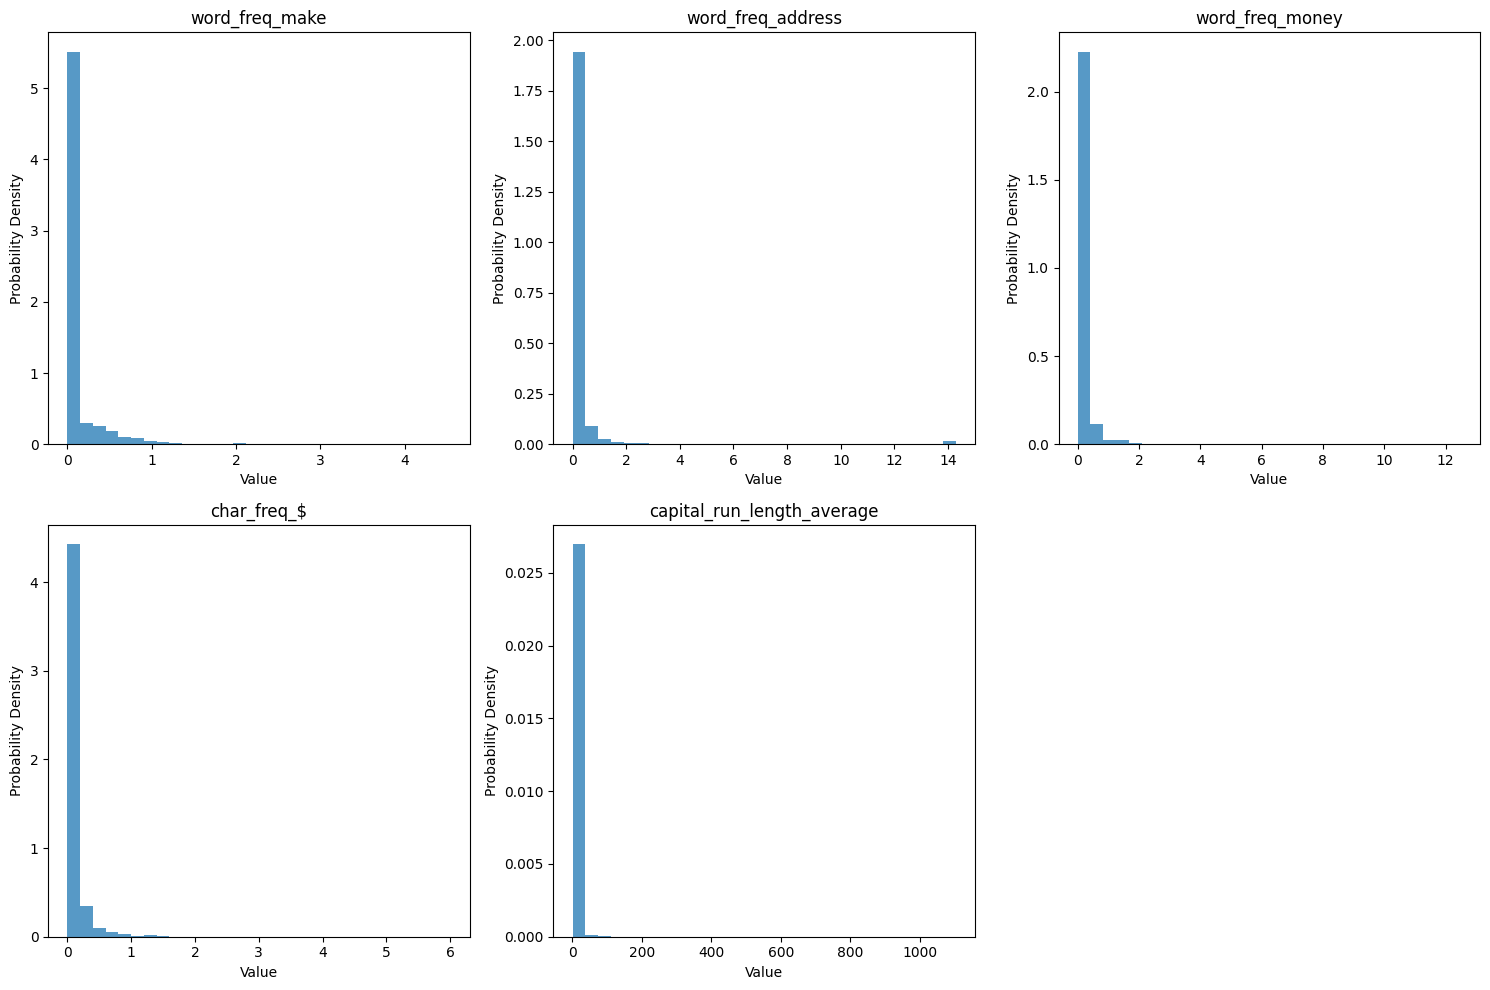

In [26]:
selected_columns = ['word_freq_make', 'word_freq_address', 'word_freq_money', 'char_freq_$', 'capital_run_length_average']

plt.figure(figsize=(15, 10))

for i, col in enumerate(selected_columns):
    plt.subplot(2, 3, i + 1)
    plt.hist(x[col], bins=30, density=True, alpha=0.75)
    plt.title(col)
    plt.xlabel("Value")
    plt.ylabel("Probability Density")

plt.tight_layout()
plt.show()

Train-Val-Test Split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.15, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,test_size=0.18, random_state=42)

Model Training

In [28]:
nb = NaiveBayes()
nb.fit(x_train, y_train)

Model Validation

In [29]:
y_val_pred=nb.predict(x_val)
accuracy, precision, recall, F1score=calc_metrics(y_val_pred,np.asarray(y_val).T[0])
print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1-Score: {F1score}")

Accuracy: 0.8735795454545454
Precision: 0.7970149253731343
Recall: 0.9270833333333334
F1-Score: 0.8571428571428572


Prediction and Evaluation

In [30]:
y_test_pred=nb.predict(x_test)
accuracy, precision, recall, F1score=calc_metrics(y_test_pred,np.asarray(y_test).T[0])
print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1-Score: {F1score}")

Accuracy: 0.849493487698987
Precision: 0.7857142857142857
Recall: 0.9046052631578947
F1-Score: 0.8409785932721712


Log Transformation

In [31]:
X=x.apply(lambda t: t.apply(lambda val: 0 if val == 0 else np.log(val)))

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.15, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,test_size=0.18, random_state=42)

In [33]:
nb1 = NaiveBayes()
nb1.fit(x_train, y_train)

In [34]:
y_val_pred=nb1.predict(x_val)
accuracy, precision, recall, F1score=calc_metrics(y_val_pred,np.asarray(y_val).T[0])
print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1-Score: {F1score}")

Accuracy: 0.7627840909090909
Precision: 0.9290780141843972
Recall: 0.4548611111111111
F1-Score: 0.6107226107226107


In [35]:
y_test_pred=nb1.predict(x_test)
accuracy, precision, recall, F1score=calc_metrics(y_test_pred,np.asarray(y_test).T[0])
print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1-Score: {F1score}")

Accuracy: 0.7076700434153401
Precision: 0.9396551724137931
Recall: 0.35855263157894735
F1-Score: 0.519047619047619


Discuss: After applying log Transformation the changes noticed are

1. Accuracy, Recall, F1-Score decreased significantly

2. Precision of the model has improved

Conclusion: The model was able to confirm positive cases i.e., Class 1 or Spam emails are classified more efficiently.

Part C: Implemention of Naive Bayes

In [36]:
x = spambase.data.features
y = spambase.data.targets

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.15, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,test_size=0.18, random_state=42)

1. Train the Model

In [38]:
nb = GaussianNB()
nb.fit(x_train, y_train.values.ravel())

GaussianNB()

In [39]:
y_val_pred=nb.predict(x_val)

In [40]:
y_val=y_val.values.ravel()

In [41]:
accuracy, precision, recall, F1score=calc_metrics(y_val,y_val_pred)
print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1-Score: {F1score}")

Accuracy: 0.84375
Precision: 0.9652777777777778
Recall: 0.7354497354497355
F1-Score: 0.8348348348348349


In [42]:
y_pred=nb.predict(x_test)

In [43]:
y_test=y_test.values.ravel()

In [44]:
accuracy, precision, recall, F1score=calc_metrics(y_test,y_pred)
print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1-Score: {F1score}")

Accuracy: 0.8248914616497829
Precision: 0.9375
Recall: 0.7364341085271318
F1-Score: 0.8248914616497829


In [45]:
y_pred_proba=nb.predict_proba(x_test)
fpr, tpr, thres = metrics.roc_curve(y_test,  y_pred_proba[:,1])

In [46]:
X=x.apply(lambda t: t.apply(lambda val: 0 if val == 0 else np.log(val)))

In [47]:
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.15, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,test_size=0.18, random_state=42)

In [48]:
nb1 = GaussianNB()
nb1.fit(x_train, y_train.values.ravel())

GaussianNB()

In [49]:
y_val_pred=nb1.predict(x_val)
y_val=y_val.values.ravel()
accuracy, precision, recall, F1score=calc_metrics(y_val,y_val_pred)
print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1-Score: {F1score}")

Accuracy: 0.9034090909090909
Precision: 0.9409722222222222
Recall: 0.8416149068322981
F1-Score: 0.8885245901639344


In [50]:
y_pred=nb1.predict(x_test)
y_test=y_test.values.ravel()
accuracy, precision, recall, F1score=calc_metrics(y_test,y_pred)
print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1-Score: {F1score}")

Accuracy: 0.8755426917510853
Precision: 0.8618421052631579
Recall: 0.8562091503267973
F1-Score: 0.8590163934426228


2. High precision: Draw a ROC curve

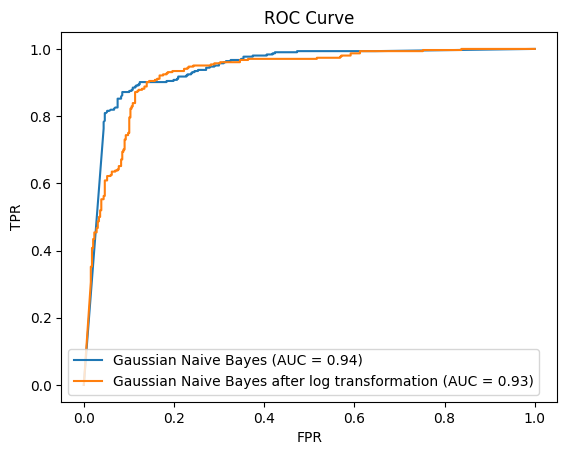

In [51]:
y_pred_proba=nb1.predict_proba(x_test)
fpr_log, tpr_log, thres_log = metrics.roc_curve(y_test,  y_pred_proba[:,1])
auc=metrics.auc(fpr,tpr).round(2)
auc_log=metrics.auc(fpr_log,tpr_log).round(2)
plt.plot(fpr,tpr,label=f"Gaussian Naive Bayes (AUC = {auc})")
plt.plot(fpr_log,tpr_log,label=f"Gaussian Naive Bayes after log transformation (AUC = {auc_log})")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('ROC Curve')
plt.show()

Conclusion: The ROC curves cross each other, that means there is a point where FPR and TPR are same for both the models, then we can no longer say that one ROC curve performs better, as it now depends on the trade-off parameter preferred. It can be high Precision/low recall or low Precision/high recall. 

By requirement we need to classify Spams correctly, we cannot afford to classify spams as not Spams, so we need high precision and low recall. Using the plot we can conclude that the Gaussian Naive Bayes after log transformation of data performs much better in classifying the spam emails, as it has high TPR and less FPR, and AUC is also higher.

TPR - True Positive Rate
FPR - False Positive Rate
AUC - Area Under Curve

3. Compare Accuracy

Accuracies: 
SVM:
Kernel:
1. Linear - 0.92
2. Polynomial with degree 2 - 0.94
3. Polynomial with degree 2 - 0.91
4. Sigmoid - 0.61
5. RBF - 0.93

Gaussian Naive Bayes:
1. Before log transformation - 0.82
2. After log transformation - 0.87

By overall comparison, SVM do have better accuracies when compared to Gaussian Naive Bayes, means SVM can almost classify Spam and Not Spam correctly but it is still not guarenteed if the actual Spams are classified as Spams or not. Therefore Accuracy cannot be the best metric to compare, we should use precision.

Accuracies: 
SVM:
Kernel:
1. Linear - 0.91
2. Polynomial with degree 2 - 0.93
3. Polynomial with degree 2 - 0.91
4. Sigmoid - 0
5. RBF - 0.93

Gaussian Naive Bayes:
1. Before log transformation - 0.94
2. After log transformation - 0.94

If we compare Precisions, Naive-Bayes comes out to be the best.